<a href="https://colab.research.google.com/github/gokipurba/Pemograman_Python/blob/main/TugasPertemuan13_Numphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


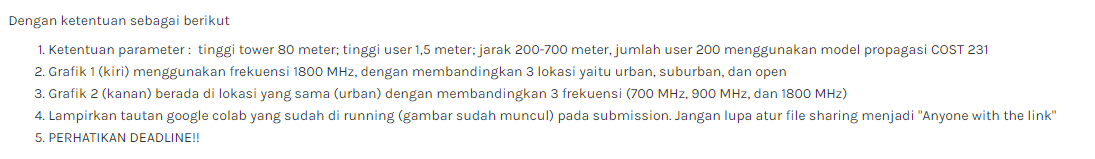

In [ ]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [28]:
#Model Frekuensi 1800
f=1800
fa=900
fb=700
loca="urban"
locb="suburban"
locc= "open"
tower=80
user=1.5
dmin=200
dmax=700
N=200

d=np.random.randint(200,700,200)
d=d[np.argsort(d)]
a= cos(f,loca,tower,user,d)
a=a[np.argsort(d)]
b= cos(f,locb,tower,user,d)
b=b[np.argsort(d)]
c= cos(f,locc,tower,user,d)
c=c[np.argsort(d)]

a1= cos(f,loca,tower,user,d)
a1=a1[np.argsort(d)]
b1= cos(fa,loca,tower,user,d)
b1=b1[np.argsort(d)]
c1= cos(fb,loca,tower,user,d)
c1=c1[np.argsort(d)]



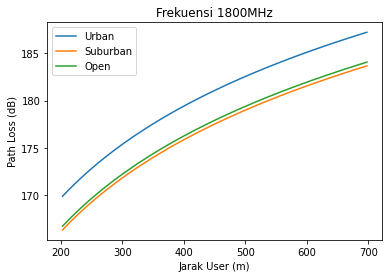

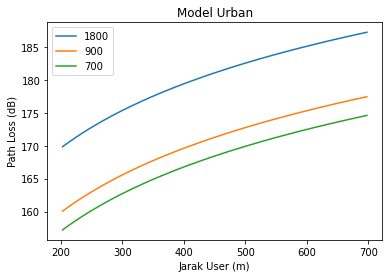

In [30]:
plt.figure("Frekuensi")
plt.title("Frekuensi 1800MHz")
plt.plot(d,a,label="Urban")
plt.plot(d,b,label="Suburban")
plt.plot(d,c,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Path Loss (dB)")

plt.figure("Mode Urban")
plt.title("Model Urban")
plt.plot(d,a1,label="1800")
plt.plot(d,b1,label="900")
plt.plot(d,c1,label="700")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Path Loss (dB)")

plt.show()